### Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.
You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.

In [2]:
# Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report

In [5]:
# Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

# titanic = pd.read_csv(Url)
# titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [6]:
#titanic.to_csv("titanic.csv")

In [3]:
df = pd.read_csv('titanic.csv').drop('Unnamed: 0',axis = 1)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
y = df['Survived']

<AxesSubplot:ylabel='Frequency'>

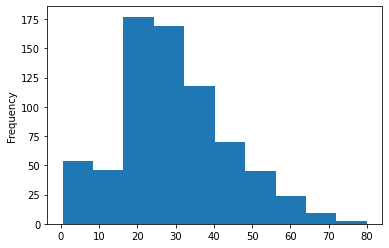

In [16]:
X['Age'].plot(kind = 'hist')

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [7]:
X_train = X_train.copy()
X_train['Missing_age'] = X_train['Age'].isnull().astype(int)
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())

In [8]:
X_train['Age'] = X_train['Age'].astype(int)

In [9]:
X_train['mapped_Sex'] = X_train['Sex'].map({'male' : 0, 'female': 1}).astype(int)

In [10]:
X_train = X_train.drop(['Sex'],axis =1)

In [12]:
X_test = X_test.copy()
X_test['Missing_age'] = X_test['Age'].isnull().astype(int)
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].mean()).astype(int)
X_test['mapped_Sex'] = X_test['Sex'].map({'male' : 0, 'female': 1}).astype(int)
X_test = X_test.drop(['Sex'],axis =1)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
d_clf = DecisionTreeClassifier()

In [15]:
d_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
y_pred = d_clf.predict(X_test)

acc = metrics.accuracy_score(y_test,y_pred)
print('The accuracy score:', acc)

The accuracy score: 0.7399103139013453


In [17]:
metrics.confusion_matrix(y_test,y_pred)

array([[107,  27],
       [ 31,  58]], dtype=int64)

In [18]:
d_clf1 = DecisionTreeClassifier(max_depth=4, max_features = 4, max_leaf_nodes = 14)
d_clf1.fit(X_train, y_train)
y_pred1 = d_clf1.predict(X_test)

acc = metrics.accuracy_score(y_test,y_pred1)
print('The accuracy score:', acc)

The accuracy score: 0.8116591928251121
